In [94]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from utils import load_dataset, train_test_split, get_weight

%matplotlib inline

# plt.rcParams['figure.figsize'] = [10, 6]
# plt.rcParams['figure.dpi'] = 200

In [3]:
# dataset_path = 'dataset_LP_1.txt' 
dataset_path = 'dataset_LP_2.csv'

X, y = load_dataset(dataset_path)

In [4]:
X.shape, y.shape

((1000, 4), (1000,))

In [5]:
training, testing = train_test_split(X, y)

In [6]:
training["X"].shape, training["y"].shape, testing["X"].shape, testing["y"].shape

((700, 4), (700,), (300, 4), (300,))

In [7]:
class Perceptron:
    def __init__(self, num_features, initialization='Random') -> None:
        self.num_features = num_features
        self.w = get_weight((num_features, 1, initialization))

    def classify(self, X):
        y = X @ self.w
        y[y > 0] = 1
        y[y < 0] = -1

        return y

    def get_misclassified(self, X, y):
        y_hat = self.classify(X).squeeze()

        mask = y != y_hat 

        return X[mask], y[mask]

In [126]:
class Perceptron(Perceptron):
    def sgd(self, X, y, learning_rate=1, epochs=5, print_freq=1):

        accuracy = []

        for i in tqdm(range(epochs)):
            misclassified_X, misclassified_y = self.get_misclassified(X, y)

            acc = 1 - len(misclassified_X) / X.shape[0]
            accuracy.append(acc)

            if print_freq and i % print_freq == 0:
                print(f"Accuracy at Iteration[{i}]: {acc}")

            self.w += (misclassified_X * misclassified_y.reshape(-1, 1)).sum(axis=0).T.reshape(-1, 1)

        return accuracy

100%|██████████| 100/100 [00:00<00:00, 14352.26it/s]


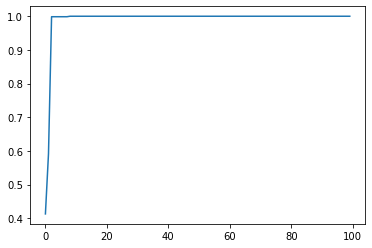

In [127]:
perceptron = Perceptron(X.shape[1])
accuracy = perceptron.sgd(
        training["X"], training["y"], learning_rate=0.5, epochs=100, print_freq=0)

plt.plot(accuracy)